In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from warnings import simplefilter 
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)

In [2]:
####################################################
############# Setear segun cada maquina ############
#os.chdir("C:/Users/herna/labo3_empresa3_repo/datasets")
os.chdir("C:/diego_tools/labo3/dataset")
####################################################

In [3]:
arch_sellout_base = "emp3_sellout_base_period_product.csv"
arch_min_max_prod = "emp3_min_max_prod.csv"
arch_mean_sd_prod = "emp3_mean_sd_prod.csv"

In [4]:
df = pd.read_csv(arch_sellout_base)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44388 entries, 0 to 44387
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   product_id                 44388 non-null  int64  
 1   periodo                    44388 non-null  int64  
 2   imputado                   44388 non-null  int64  
 3   tn                         44388 non-null  float64
 4   cust_request_tn            44388 non-null  float64
 5   cust_request_qty           44388 non-null  float64
 6   plan_precios_cuidados      44388 non-null  float64
 7   periodo_fecha              44388 non-null  object 
 8   mes                        44388 non-null  int64  
 9   cat1                       44388 non-null  object 
 10  cat2                       44388 non-null  object 
 11  cat3                       44388 non-null  object 
 12  brand                      44388 non-null  object 
 13  sku_size                   44388 non-null  flo

## Transformación

In [9]:
def normalizar_valor(valor,minimo,maximo):
    if (maximo-minimo)==0: 
        return 0
    else:
        return (valor - minimo) / (maximo-minimo)

def normalizar_tn(df_param):
    #Calculo min max solamente sobre train (para evitar data leakage)
    df_train = df_param[df_param.accion=="train"]
    df_train = df_train[["product_id","tn"]]
    
    #Calculo min max por producto y lo guardo para poder revertir posteriormente
    df_min_max_prod = df_train.groupby('product_id')['tn'].agg(['max', 'min']).reset_index()
    df_min_max_prod.to_csv(arch_min_max_prod, index=False)
        
    df_param = df_param.merge(df_min_max_prod,how="inner",on="product_id")
    df_param["tn_normalizado"]=df_param.apply(lambda row: normalizar_valor(row["tn"],row["min"],row["max"]),axis=1)
    
    return df_param

def graficar_ejemplo_normalizacion(df_param):
    df_param = df_param[df_param.product_id==20001]
    
    plt.plot(df_param.tn)
    plt.title("Original")
    plt.show()
    
    plt.plot(df_param.tn_normalizado)
    plt.title("Normalizado")
    plt.show()

def estandarizar_tn(df):
    print("estandarizacion pendiente")

Normalizacion


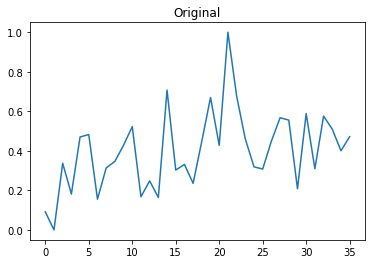

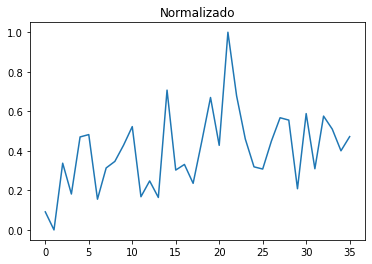

,product_id,periodo,imputado,tn,cust_request_qty,plan_precios_cuidados,periodo_fecha,mes,cat1,cat2,...,sku_size,producto_estrella,temp_media,temp_max_media,temp_min_media,IPC,promedio_mens_dolar_venta,catastrofe,accion,dif_tn_req_porc
0,20001,201701,0,0.091342,479.0,0.0,2017-01-01,1,HC,ROPA LAVADO,...,3000.0,1.0,25.65,30.4,20.9,1.6,15.91,False,train,0.003151
1,20001,201702,0,0.000000,432.0,0.0,2017-02-01,2,HC,ROPA LAVADO,...,3000.0,1.0,25.35,30.1,20.6,2.1,15.59,False,train,0.042827
2,20001,201703,0,0.337528,509.0,0.0,2017-03-01,3,HC,ROPA LAVADO,...,3000.0,1.0,22.45,26.9,18.0,2.4,15.52,False,train,0.020582
3,20001,201704,0,0.181638,279.0,0.0,2017-04-01,4,HC,ROPA LAVADO,...,3000.0,1.0,18.90,23.5,14.3,2.7,15.36,False,train,0.055592
4,20001,201705,0,0.470340,701.0,0.0,2017-05-01,5,HC,ROPA LAVADO,...,3000.0,1.0,15.90,19.5,12.3,1.4,15.72,False,train,0.031269


In [10]:
tipos_transf = ['sin_transf', 'norm', 'estand']

tipo_transf = tipos_transf[1]

if tipo_transf == tipos_transf[0]:
    print("Sin transformacion de tn")
elif tipo_transf == tipos_transf[1]:
    print("Normalizacion")
    df = normalizar_tn(df)
    df.tn = df.tn_normalizado
    graficar_ejemplo_normalizacion(df)
    df = df.drop(columns=["tn_normalizado","min","max"])
    
elif normalizacion == tipos_transf[2]:
    print("Estandarizacion")
    estandarizar_tn(df)
df.head()

In [20]:
df.periodo.unique()

array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708,
       201709, 201710, 201711, 201712, 201801, 201802, 201803, 201804,
       201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812,
       201902], dtype=int64)

In [21]:
df.isna().sum()

product_id                      0
periodo                         0
imputado                        0
tn                              0
cust_request_qty                0
plan_precios_cuidados           0
periodo_fecha                   0
mes                             0
cat1                            0
cat2                            0
cat3                            0
brand                           0
sku_size                        0
producto_estrella               0
temp_media                      0
temp_max_media                  0
temp_min_media                  0
IPC                             0
promedio_mens_dolar_venta       0
catastrofe                      0
accion                          0
dif_tn_req_porc                 0
tn_lag_1                     1233
tn_lag_2                     2466
tn_lag_3                     3699
tn_mas_2                        0
tn_delta_1                   1233
tn_delta_2                   2466
tn_delta_3                   3699
dtype: int64

In [22]:
df.to_csv("emp3_sellout_product_train_"+ tipo_transf + ".csv", index=False)